In [1]:
from statsbombpy import sb
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from math import log

In [2]:
# 1) I

two_four_path_base = "mls-24-fbref-data-may-1/"
rank_west_24 = pd.read_csv(two_four_path_base + "/ranking-west.csv")
rank_east_24 = pd.read_csv(two_four_path_base + "ranking-east.csv")

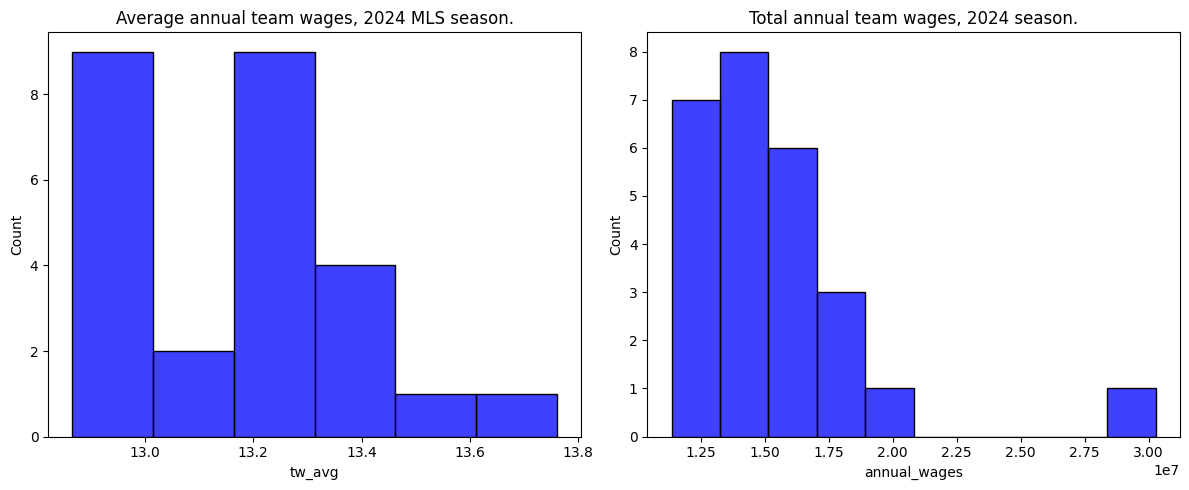

In [3]:
team_wages = pd.read_csv(two_four_path_base + "team-wages.csv")
team_wages["annual_wages"] = (
    team_wages["annual_wages"].str.extract(r'\$(\d+)')
    .astype(int)
)
team_wages["weekly_wages"] = (
    team_wages["weekly_wages"].str.extract(r'\$(\d+)')
    .astype(int)
)
team_wages["tw_avg"] = np.log(round(team_wages["annual_wages"] / team_wages["players_contracted"], 2))

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(team_wages["tw_avg"], ax=axes[0] , color="blue")
axes[0].set_title("Average annual team wages, 2024 MLS season.")


sns.histplot(team_wages["annual_wages"], ax=axes[1], color="blue")
axes[1].set_title("Total annual team wages, 2024 season.")

plt.tight_layout()
plt.show()

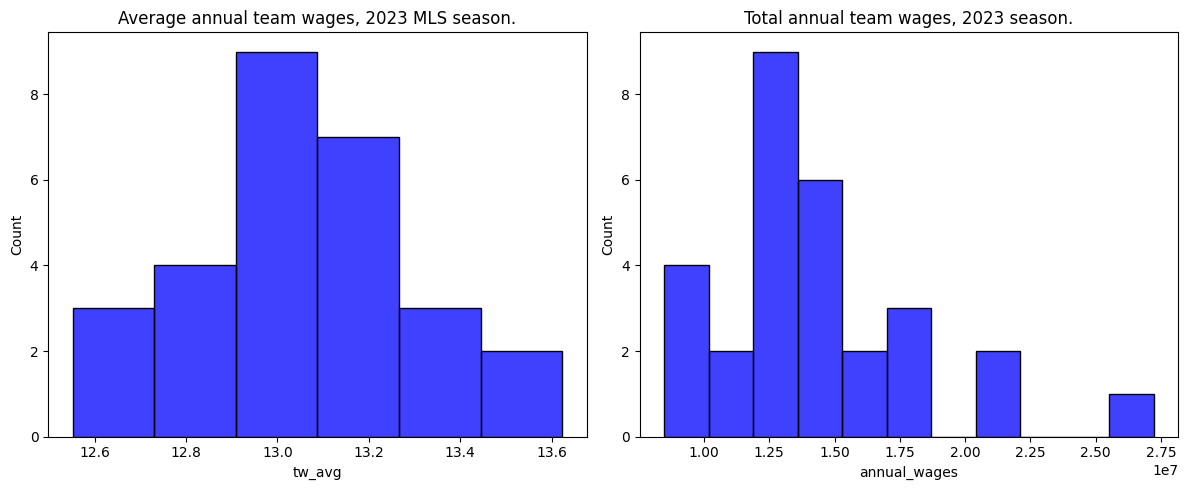

In [4]:
two_three_base = "mls-23-fb-ref-data/"
rank_west_23 = pd.read_csv(two_three_base + "w-standings.csv")
rank_east_23 = pd.read_csv(two_three_base + "standings.csv")
team_wages_23 = pd.read_csv(two_three_base + "team-wages.csv")

team_wages_23 = pd.read_csv(two_three_base + "team-wages.csv")
team_wages_23["annual_wages"] = (
    team_wages_23["annual_wages"].str.extract(r'\$(\d+)')
    .astype(int)
)
team_wages_23["weekly_wages"] = (
    team_wages_23["weekly_wages"].str.extract(r'\$(\d+)')
    .astype(int)
)
team_wages_23["tw_avg"] = np.log(round(team_wages_23["annual_wages"] / team_wages_23["players_contracted"], 2))

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.histplot(team_wages_23["tw_avg"], ax=axes[0] , color="blue")
axes[0].set_title("Average annual team wages, 2023 MLS season.")


sns.histplot(team_wages_23["annual_wages"], ax=axes[1], color="blue")
axes[1].set_title("Total annual team wages, 2023 season.")

plt.tight_layout()
plt.show()


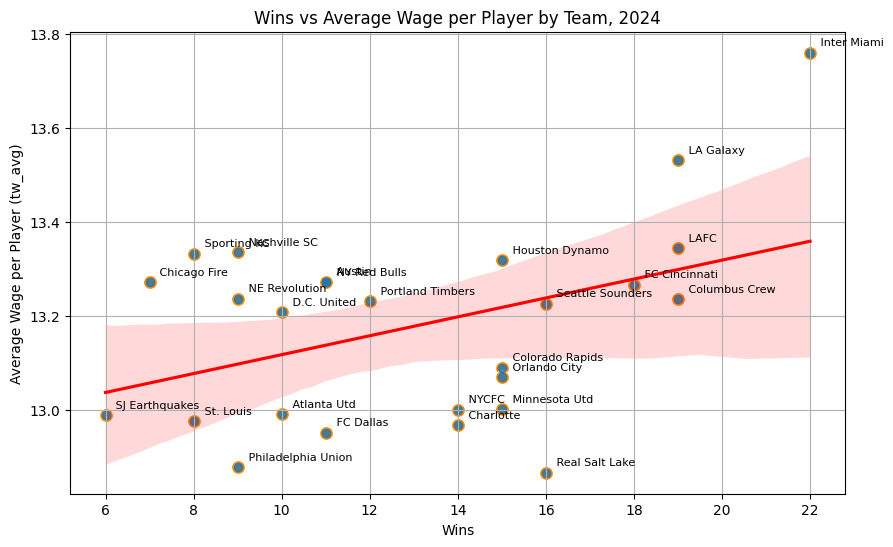

In [5]:
# Lets plot team wins vs average annual team wages to see if we can see a visualize
# relationship between team spend and regular season wins. 2024

total_ranking_24 = pd.concat([rank_west_24, rank_east_24], ignore_index=True)
total_ranking_24 = total_ranking_24.merge(team_wages[["team", "tw_avg"]], on="team", how="left")


plt.figure(figsize=(10, 6))

# Draw scatter plot for wins vs tw_avg
sns.scatterplot(data=total_ranking_24, x='wins', y='tw_avg', s=100, color="darkorange")
sns.regplot(data=total_ranking_24, x='wins', y='tw_avg', ci=95, line_kws={"color": "red"})

# Add labels for each point
for i, row in total_ranking_24.iterrows():
    plt.annotate(row['team'], (row['wins'], row['tw_avg']),
                 textcoords="offset points",
                 xytext=(5,5),
                 ha='left',
                 fontsize=8)

plt.xlabel("Wins")
plt.ylabel("Average Wage per Player (tw_avg)")
plt.title("Wins vs Average Wage per Player by Team, 2024")
plt.grid(True)
plt.show()

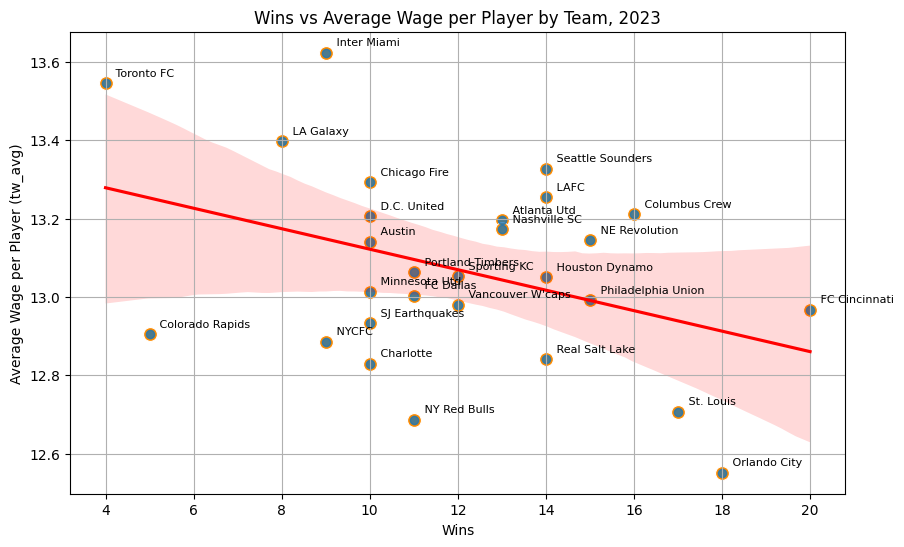

In [6]:
total_ranking_23 = pd.concat([rank_west_23, rank_east_23], ignore_index=True)
total_ranking_23 = total_ranking_23.merge(team_wages_23[["team", "tw_avg"]], on="team", how="left")


plt.figure(figsize=(10, 6))

# Draw scatter plot for wins vs tw_avg
sns.scatterplot(data=total_ranking_23, x='wins', y='tw_avg', s=100, color="darkorange")
sns.regplot(data=total_ranking_23, x='wins', y='tw_avg', ci=95, line_kws={"color": "red"})

# Add labels for each point
for i, row in total_ranking_23.iterrows():
    plt.annotate(row['team'], (row['wins'], row['tw_avg']),
                 textcoords="offset points",
                 xytext=(5,5),
                 ha='left',
                 fontsize=8)

plt.xlabel("Wins")
plt.ylabel("Average Wage per Player (tw_avg)")
plt.title("Wins vs Average Wage per Player by Team, 2023")
plt.grid(True)
plt.show()

In [7]:
# Is there any statistical significance between wins and player wages

concat_seasons = pd.concat([total_ranking_24, total_ranking_23], ignore_index = True)
concat_clean = concat_seasons[['wins', 'tw_avg']].dropna()
concat_clean.head()
corr_coef, p_value = pearsonr(concat_clean["wins"], concat_clean["tw_avg"])

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3g}")

if p_value < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("The correlation is NOT statistically significant at the 5% level.")


Pearson correlation coefficient: 0.034
P-value: 0.806
The correlation is NOT statistically significant at the 5% level.


In [8]:
# 2) How much is our organization worth at the moment? What would be a viable sales price in five years? 

# Accoring to Forbes as of Feb 21, 2025, 06:00am EST, the colorado rapids are worth
# $415 million
# Revenue: $42 million | Operating Income: -$8 million | One-Year Change: 4%

In [9]:
# soccer is had because the value of a player can't easily be extraploated from numbers.

# 3) How much did each player on our roster contribute last year, and how did that compare to others in the league? 
#    How much did each player on our roster make last year? Given their salary, did they over/under perform relative to others in the league, and at the same position? 

def analyze_rapids_players(df, metric_columns, team_col='team_x', name_col='player'):
    if df is None:
        return None

    if team_col not in df.columns or not all(col in df.columns for col in metric_columns):
        missing = [col for col in metric_columns if col not in df.columns]
        print(f"Warning: missing columns: {missing}")
        return None
    
    df['is_rapids'] = df[team_col] == 'Colorado Rapids'
    
    rapids_players = df[df['is_rapids']].copy()
    mls_players = df[~df['is_rapids']].copy()
    
    print(f"Rapids players: {len(rapids_players)}")
    print(f"Other MLS players: {len(mls_players)}")
    
    # Calculate efficiency metrics (per dollar)
    if 'annual_wages' in df.columns:
        for metric in metric_columns:
            if metric in df.columns:
                df[f'{metric}_per_dollar'] = df[metric] / np.log((df['weekly_wages']))  # Add 1 to avoid division by zero
    
    return {
        'all_players': df,
        'rapids_players': rapids_players,
        'mls_players': mls_players
    }

def plot_rapids_vs_mls(analysis_dict, metrics, title, salary_based=True, sample_size=100):
    if analysis_dict is None:
        print(f"Cannot create {title} visualization - data not available")
        return
    
    rapids = analysis_dict['rapids_players']
    mls = analysis_dict['mls_players']
    
    mls_sample = mls.sample(min(sample_size, len(mls))) if len(mls) > sample_size else mls

    n_metrics = len([m for m in metrics if m in rapids.columns])
    if n_metrics == 0:
        print(f"No metrics available for {title}")
        return
        
    # Set up subplot grid - maximum 3 plots per row
    cols = min(3, n_metrics)
    rows = (n_metrics + cols - 1) // cols
    
    fig = plt.figure(figsize=(6*cols, 5*rows))
    fig.suptitle(f"{title} Metrics", fontsize=16)
    plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
    
    for i, metric in enumerate([m for m in metrics if m in rapids.columns]):
        ax = fig.add_subplot(rows, cols, i+1)
        
        if salary_based and 'weekly_wages' in rapids.columns:
            ax.scatter(mls_sample['weekly_wages'], mls_sample[metric], alpha=0.3, s=20, label='Other MLS Players')
            ax.scatter(rapids['weekly_wages'], rapids[metric], alpha=0.9, s=50, color='red', label='Colorado Rapids')
            
            for _, player in rapids.iterrows():
                ax.annotate(player['player'], 
                           (player['weekly_wages'], player[metric]),
                           fontsize=7, alpha=0.7)
            
            ax.set_xlabel('Salary ($)')
            ax.set_ylabel(metric.replace('_', ' ').title())
            ax.set_title(f'{metric.replace("_", " ").title()}')
            
            all_players = analysis_dict['all_players']
            mask = ~all_players['weekly_wages'].isna() & ~all_players[metric].isna()
            if mask.sum() > 2:  # Need at least 3 points for regression
                sns.regplot(x='weekly_wages', y=metric, data=all_players[mask], 
                           scatter=False, ci=None, line_kws={"color":"black", "linestyle":"--", "alpha":0.7},
                           ax=ax)
        
        if i == 0:
            ax.legend()
        
    plt.tight_layout()
    plt.show()

def convert_str_wage_to_int(df):
    df = df.dropna(subset=["annual_wages", "weekly_wages"])
    
    df["annual_wages"] = (
        df["annual_wages"].str.extract(r'\$(\d+)')
        .astype(int)
    )
    df["weekly_wages"] = (
        df["weekly_wages"].str.extract(r'\$(\d+)')
        .astype(int)
    )

    return df

defensive_metrics = ['tackles', 'blocks', 'clearances']
shooting_metrics = ['goals', 'goals_per_shot']
chance_creation_metrics = ['sca_per90', 'gca_per90']

defense_stats_24 = pd.read_csv(two_four_path_base + "/defense.csv")
shooting_stats_24 = pd.read_csv(two_four_path_base + "/player-shooting.csv")
chances_stats_24 = pd.read_csv(two_four_path_base + "/goal-chance-creation.csv")
player_wages_24 = pd.read_csv(two_four_path_base + "/player-wages.csv")
player_wages_24 = convert_str_wage_to_int(player_wages_24)
#24 standard stats

defense_stats_24 = defense_stats_24.merge(player_wages_24, on="player", how="left")
shooting_stats_24 = shooting_stats_24.merge(player_wages_24, on="player", how="left")
chances_stats_24 = chances_stats_24.merge(player_wages_24, on="player", how="left")


defense_stats_23 = pd.read_csv(two_three_base + "defense.csv")
shooting_stats_23 = pd.read_csv(two_three_base + "player-shooting.csv")
chances_stats_23 = pd.read_csv(two_three_base + "gca.csv")
player_wages_23 = pd.read_csv(two_three_base + "player-wages.csv")
player_wages_23 = convert_str_wage_to_int(player_wages_23)
# standard_stats_23 = pd.read_csv(two_three_base + "player-standard-stats.csv")


rapids_23 = standard_stats_23[standard_stats_23["team"] == "Colorado Rapids"]
defense_stats_23 = defense_stats_23.merge(player_wages_23, on="player", how="left")
defense_stats_23 = defense_stats_23[defense_stats_23["minutes_90s"] > 15]
shooting_stats_23 = shooting_stats_23.merge(player_wages_23, on="player", how="left")
shooting_stats_23 = shooting_stats_23[shooting_stats_23["minutes_90s"] > 15]
chances_stats_23 = chances_stats_23.merge(player_wages_23, on="player", how="left")
chances_stats_23 = chances_stats_23[chances_stats_23["minutes_90s"] > 15]

defense_analysis = analyze_rapids_players(defense_stats_23[defense_stats_23["position_x"] == "DF"], defensive_metrics)
shooting_analysis = analyze_rapids_players(shooting_stats_23[shooting_stats_23["position_x"].isin(["FW", "MF", "FWMF", "MFFW"])], shooting_metrics)
chance_analysis = analyze_rapids_players(chances_stats_23[chances_stats_23["position_x"].isin(["FW", "MF", "FWMF", "MFFW"])], chance_creation_metrics)

plot_rapids_vs_mls(defense_analysis, defensive_metrics, 'Defense vs Salary 2023')
plot_rapids_vs_mls(shooting_analysis, shooting_metrics, 'Shooting vs Salary 2023')
plot_rapids_vs_mls(chance_analysis, chance_creation_metrics, 'Chance vs Salary 2023')

/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/789202803.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["annual_wages"] = (
/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/789202803.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekly_wages"] = (
/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/789202803.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

NameError: name 'standard_stats_23' is not defined

/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/789202803.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["annual_wages"] = (
/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/789202803.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekly_wages"] = (
/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/789202803.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Rapids players: 4
Other MLS players: 111
Rapids players: 7
Other MLS players: 159
Rapids players: 7
Other MLS players: 159


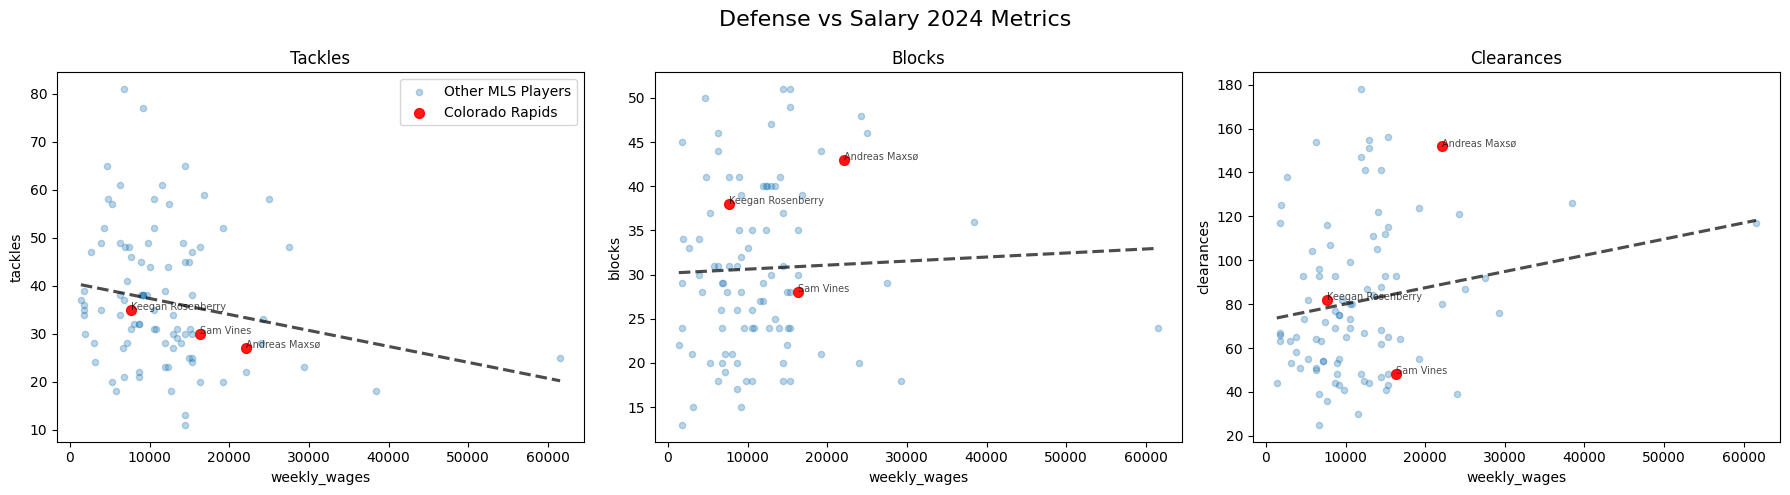

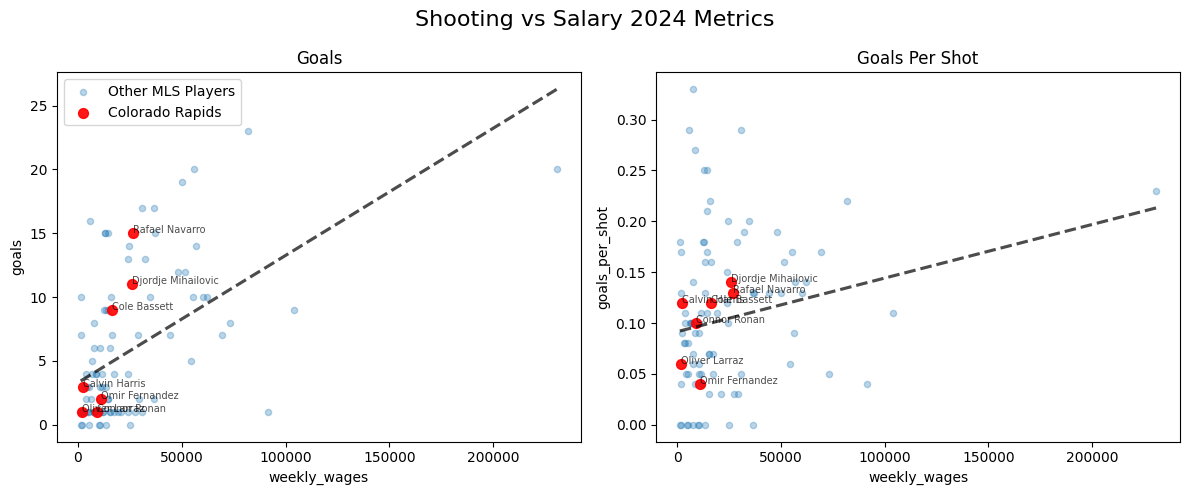

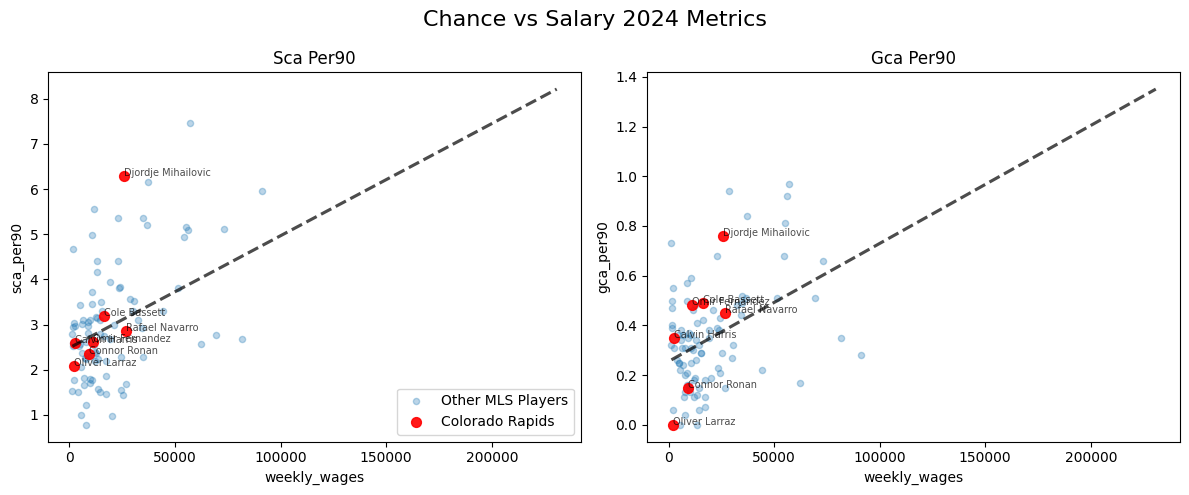

In [10]:

defense_stats_24 = pd.read_csv(two_four_path_base + "/defense.csv")
shooting_stats_24 = pd.read_csv(two_four_path_base + "/player-shooting.csv")
chances_stats_24 = pd.read_csv(two_four_path_base + "/goal-chance-creation.csv")
player_wages_24 = pd.read_csv(two_four_path_base + "/player-wages.csv")
player_wages_24 = convert_str_wage_to_int(player_wages_24)
#24 standard stats

defense_stats_24 = defense_stats_24.merge(player_wages_24, on="player", how="left")
defense_stats_24 = defense_stats_24[defense_stats_24["minutes_90s"] > 15]
shooting_stats_24 = shooting_stats_24.merge(player_wages_24, on="player", how="left")
shooting_stats_24 = shooting_stats_24[shooting_stats_24["minutes_90s"] > 15]
chances_stats_24 = chances_stats_24.merge(player_wages_24, on="player", how="left")
chances_stats_24 = chances_stats_24[chances_stats_24["minutes_90s"] > 15]


defense_analysis = analyze_rapids_players(defense_stats_24[defense_stats_24["position_x"] == "DF"], defensive_metrics)
shooting_analysis = analyze_rapids_players(shooting_stats_24[shooting_stats_24["position_x"].isin(["FW", "MF", "FWMF", "MFFW"])], shooting_metrics)
chance_analysis = analyze_rapids_players(chances_stats_24[chances_stats_24["position_x"].isin(["FW", "MF", "FWMF", "MFFW"])], chance_creation_metrics)

plot_rapids_vs_mls(defense_analysis, defensive_metrics, 'Defense vs Salary 2024')
plot_rapids_vs_mls(shooting_analysis, shooting_metrics, 'Shooting vs Salary 2024')
plot_rapids_vs_mls(chance_analysis, chance_creation_metrics, 'Chance vs Salary 2024')

In [11]:
# 4) How can we upgrade our roster while continuing to be consistent with our payroll? 

In [13]:
twenty_five_base = "mls-25-fbref-data-may-1"
defense_stats_25 = pd.read_csv(twenty_five_base + "/defense.csv")
shooting_stats_25 = pd.read_csv(twenty_five_base + "/shooting.csv")
chances_stats_25 = pd.read_csv(twenty_five_base + "/goal-chance-creation.csv")
player_wages_25 = pd.read_csv(twenty_five_base + "/player-wages.csv")
player_wages_25 = convert_str_wage_to_int(player_wages_25)
#24 standard stats

defense_stats_25 = defense_stats_25.merge(player_wages_24, on="player", how="left")
defense_stats_25 = defense_stats_25[defense_stats_24["minutes_90s"] > 10]
shooting_stats_25 = shooting_stats_25.merge(player_wages_24, on="player", how="left")
shooting_stats_25 = shooting_stats_25[shooting_stats_24["minutes_90s"] > 10]
chances_stats_25 = chances_stats_25.merge(player_wages_24, on="player", how="left")
chances_stats_25 = chances_stats_25[chances_stats_24["minutes_90s"] > 10]


defense_analysis = analyze_rapids_players(defense_stats_25[defense_stats_25["position_x"] == "DF"], defensive_metrics)
shooting_analysis = analyze_rapids_players(shooting_stats_25[shooting_stats_25["position_x"].isin(["FW", "MF", "FWMF", "MFFW"])], shooting_metrics)
chance_analysis = analyze_rapids_players(chances_stats_25[chances_stats_25["position_x"].isin(["FW", "MF", "FWMF", "MFFW"])], chance_creation_metrics)

plot_rapids_vs_mls(defense_analysis, defensive_metrics, 'Defense vs Salary 2025')
plot_rapids_vs_mls(shooting_analysis, shooting_metrics, 'Shooting vs Salary 2025')
plot_rapids_vs_mls(chance_analysis, chance_creation_metrics, 'Chance vs Salary 2025')

/var/folders/lh/hnn_zc990kd0p5ht3_z7nc4m0000gn/T/ipykernel_21323/2683789043.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  defense_stats_25 = defense_stats_25[defense_stats_24["minutes_90s"] > 10]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).